# Fourier Transform and Discrete Fourier Transform



In this notebook we will look at the Fourier Transform and Discrete Fourier Transform and in particular the DF of real-world signals. We will learn implementation of FT, how to deal with $i$ and discrete signals. We will examine how to map the DFT coefficients to real-world frequencies and we will investigate the frequency resolution of the DFT

As a quick reminder, the Fourier Transform decomposes a signal into the frequencies that make it up. Any continous signal in the time domain can be represented uniquely and unabigously by an inifinite series of sinusoids. 


$x(t)$.

$f(t)= \frac{a_{0}}{2} + \sum^{\infty}_{k=1} a_{k}\;cos(2 \pi kt) + b_{k} \;sin (2\pi kt)$ 

X(F)$\int^{\infty}_{-\infty}x(t) \; e^{-2 \pi i F t} dt$

The $i$ is a complex number which denotes $i^2=-1$ or $\sqrt{-1}=i$, and the form of the complex number is $a + bi$


$e^{i \theta} = \; cos \;\theta + i \; sin \;\theta$


${X}= X_{0},X_{1},X_{2},...,X_{N-1}$

$X_{k} = \sum^{N-1}_{n=0} x_{n}[cos(- \frac{2 \pi kn}{N}) + i \;sin \;(\frac{2 \pi k n }{N})]$ 

$\; = \underbrace{\sum^{N-1}_{n=0} x_{n}[cos(\frac{2 \pi kn}{N})}_{A_{k}} - \underbrace{i \sum^{N-1}_{n=0} sin(\frac{2 \pi k n }{N})]}_{B_{k}}$ 



The definitions of the direct and inverse DFT for a length-$N$ signal are:

\begin{align*}
    X[k] &= \sum_{n=0}^{N-1} x[n]\, e^{-j\frac{2\pi}{N}nk}, \quad k=0, \ldots, N-1 \\
    x[n] &= \frac{1}{N}\sum_{k=0}^{N-1} X[k]\, e^{j\frac{2\pi}{N}nk}, \quad n=0, \ldots, N-1
\end{align*}

The DFT produces a complex-valued vector that we can represent either via its real and imaginary parts or via its magnitude $|X[k]|$ and phase $\angle X[k] = \arctan \frac{\text{Im}\{X[k]\}}{\text{Re}\{X[k]\}}$.

# Signal generation and phase shift

Let's generate a sinusodial signal by using the following equation: $y(t)= \underbrace{A}_{\text{Amplitude}}  sin (2 \pi \underbrace{f}_{\text{Frequency}} t + \underbrace{\tau}_{\text{Phase Shift}})$. Once we generated our signal, we can use the signal in the FFT function to see what kind of coefficients we will obtain!

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.fft import fft

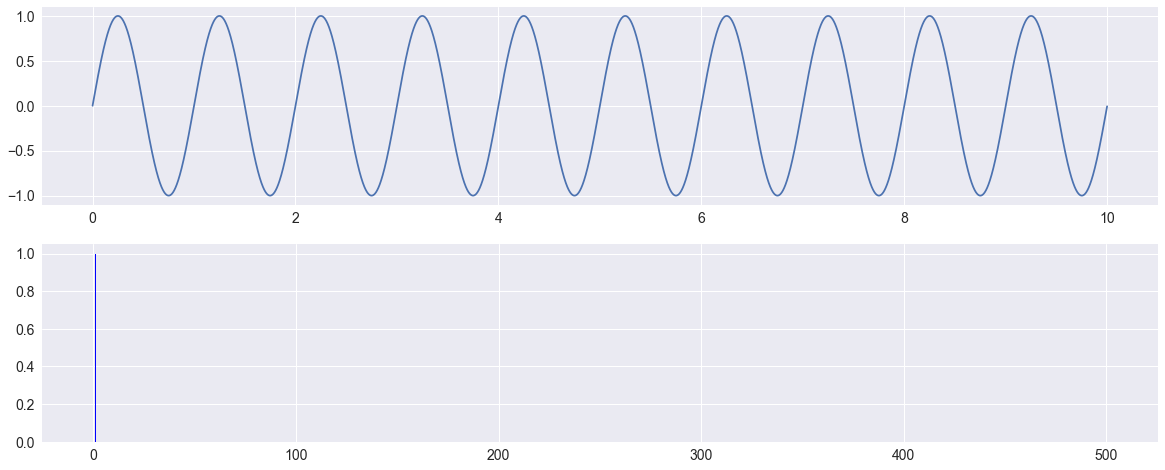

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.fft import fft
import math
def gen_wave (freq, amp, T, shift, sr):

    time = np.arange(0,T,1/sr)
    
    X = amp*np.sin(2*np.pi*freq*time+shift)

    return time,X

plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))



#  Generate signals
sr=1000 #in Hz
x,y   = gen_wave(1,1,10,0,sr)

#  Anomally
# y[2*sr:3*sr] = y[2*sr:3*sr] + y2[2*sr:3*sr]
axarr[0].plot(x, y)

n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
# axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()



Now let's add two sinusodials together and obtain a new one! Our new summation is as follows $signal_{new}=signal_{1}+signal_{2}$. 

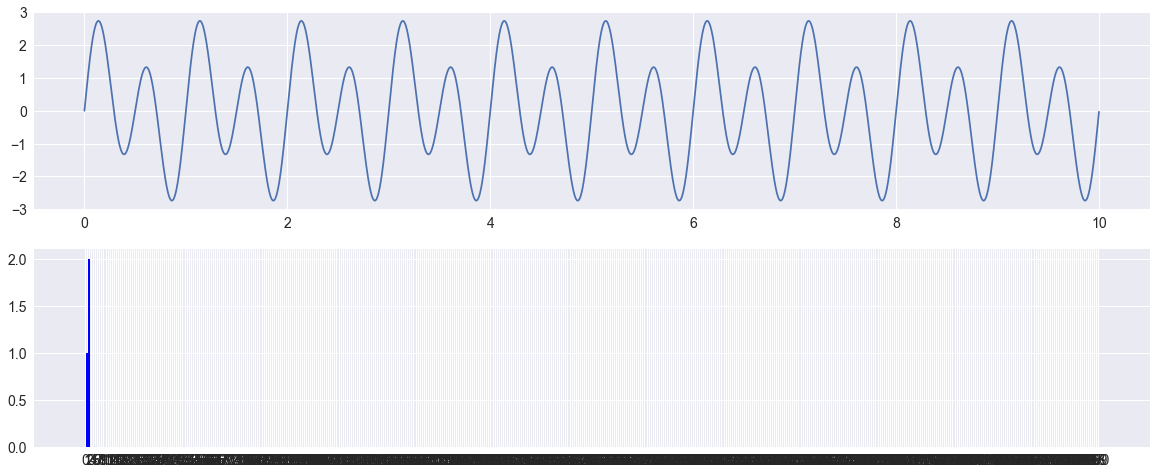

In [61]:
plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=1000
x,y   = gen_wave(1,1,10,0,sr)

x,y2   = gen_wave(2,2,10,0,sr)

# Add two sinusodials 
y= y+y2
#  Anomally
# y[2*sr:3*sr] = y[2*sr:3*sr] + y2[2*sr:3*sr]
axarr[0].plot(x, y)

n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()

This time let's add three sinusodials as follows: $signal_{new}=signal_{1}+signal_{2}+signal_{3}$ and calculate fft of the generated signal!

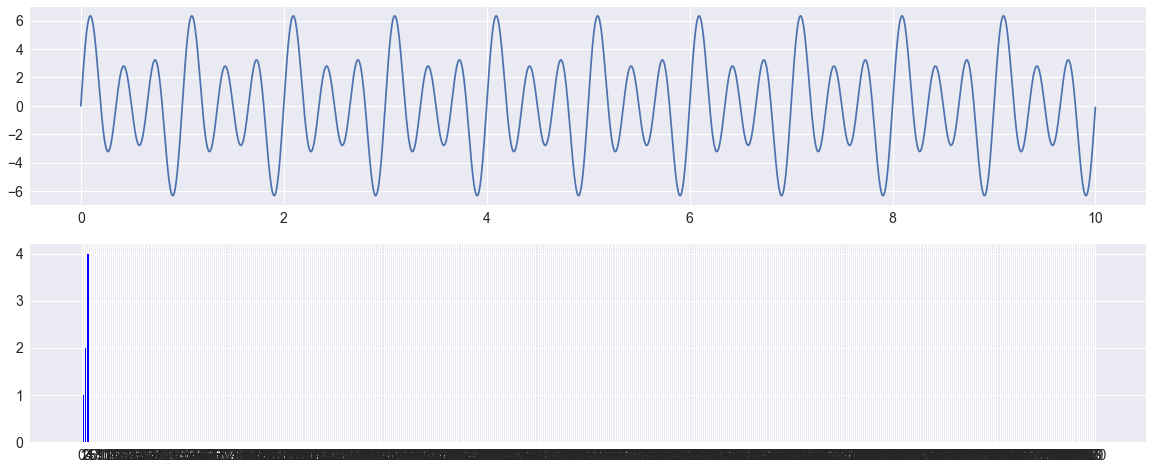

In [62]:
plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=1000
x,amplitude1   = gen_wave(1,1,10,0,sr)

x,amplitude2   = gen_wave(2,2,10,0,sr)

x,amplitude3   = gen_wave(3,4,10,0,sr)

# Add two sinusodials 
amplitude= amplitude1+amplitude2 + amplitude3
#  Anomally
# y[2*sr:3*sr] = y[2*sr:3*sr] + y2[2*sr:3*sr]
axarr[0].plot(x, amplitude)

n = len(amplitude) 
p = fft(amplitude) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()

Now that we know how to generate signals and apply FFT function on our signal in a black box manner, we can start experimenting with different phase shift to see what kind of output we will get! To notice the difference, you have to pay attention to the beginning point of the first sinusodial. 

In [ ]:
plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=1000
x1,amplitude1   = gen_wave(1,1,10,1,sr)

x2,amplitude2   = gen_wave(2,2,10,1,sr)

x3,amplitude3   = gen_wave(3,4,10,1,sr)

# Add two sinusodials 
amplitude= amplitude1+amplitude2 + amplitude3
#  Anomally
# y[2*sr:3*sr] = y[2*sr:3*sr] + y2[2*sr:3*sr]
axarr[0].plot(x1, amplitude)

n = len(amplitude) 
p = fft(amplitude) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x1, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x1), max(x1)+1, 1.0))

plt.show()

## Direct Implementation of DFT

### Numerical errors in real and imaginary parts

The DFT can be easily implemented using the change of basis matrix ${W}_N$. This is an $N\times N$ complex-valued matrix whose elements are 

$$
    {W}_N(n,k)=e^{-j\frac{2\pi}{N}nk}
$$

so that the DFT of a vector $\mathbf{x}$ is simply $\mathbf{X} = W_N\mathbf{x}$. Note that the inverse DFT can be obtained by simply conjugating ${W}_N$ so that $\mathbf{x} = W_N^*\mathbf{X}$.

We can easily generate the matrix ${W}_N$ in Python like so:

In [64]:
import math
def dft_matrix(N):
    # create a 1xN matrix containing indices 0 to N-1
    a = np.expand_dims(np.arange(N), 0)
    print("a.T * a: ",a.T * a)
    # take advantage of numpy broadcasting to create the matrix
    W = np.exp(-2j * (np.pi / N) * (a.T * a))
    
    return W

x,y   = gen_wave(2,1,1,0,50)
print(y)


# DFT matrix
N = len(y)
W = dft_matrix(N);

# DFT
print("First DFT: ",np.round(np.dot(W, y),2))

y=np.reshape(y,(len(y),1))
N=len(y)
a = np.expand_dims(np.arange(N), 0)
M=(a.T * a)*(2*np.pi/N)
Xa = np.cos(M).dot(y)
Xb = np.sin(M).dot(y)
DFT= [Xa,Xb]
print("DFT with sine and cosine: \n", np.round(DFT,2))


# inverse DFT
x_hat = np.dot(W.T.conjugate(), y) / N
print(x_hat)
print(y-x_hat)


[ 0.00000000e+00  2.48689887e-01  4.81753674e-01  6.84547106e-01
  8.44327926e-01  9.51056516e-01  9.98026728e-01  9.82287251e-01
  9.04827052e-01  7.70513243e-01  5.87785252e-01  3.68124553e-01
  1.25333234e-01 -1.25333234e-01 -3.68124553e-01 -5.87785252e-01
 -7.70513243e-01 -9.04827052e-01 -9.82287251e-01 -9.98026728e-01
 -9.51056516e-01 -8.44327926e-01 -6.84547106e-01 -4.81753674e-01
 -2.48689887e-01 -2.44929360e-16  2.48689887e-01  4.81753674e-01
  6.84547106e-01  8.44327926e-01  9.51056516e-01  9.98026728e-01
  9.82287251e-01  9.04827052e-01  7.70513243e-01  5.87785252e-01
  3.68124553e-01  1.25333234e-01 -1.25333234e-01 -3.68124553e-01
 -5.87785252e-01 -7.70513243e-01 -9.04827052e-01 -9.82287251e-01
 -9.98026728e-01 -9.51056516e-01 -8.44327926e-01 -6.84547106e-01
 -4.81753674e-01 -2.48689887e-01]
a.T * a:  [[   0    0    0 ...    0    0    0]
 [   0    1    2 ...   47   48   49]
 [   0    2    4 ...   94   96   98]
 ...
 [   0   47   94 ... 2209 2256 2303]
 [   0   48   96 ... 22

In [65]:
x = np.array([5, 7, 9])

# DFT matrix
N = len(x)
W = dft_matrix(N);

# DFT
X = np.dot(W, x)
print(X)
# inverse DFT
x_hat = np.dot(W.T.conjugate(), X) / N
print(x_hat)
print(x-x_hat)

a.T * a:  [[0 0 0]
 [0 1 2]
 [0 2 4]]
[21.+0.j         -3.+1.73205081j -3.-1.73205081j]
[5.-3.25665421e-15j 7.+0.00000000e+00j 9.+1.85037171e-15j]
[-8.88178420e-16+3.25665421e-15j  1.77635684e-15+0.00000000e+00j
  0.00000000e+00-1.85037171e-15j]


As you can see, the difference between the original vector and the "reconstructed" vector is not exactly zero. This is due to the small numerical errors that accumulate in the $N^2$ multiplications and additions needed by the direct and inverse transforms. 

While minor in this case, this numerical imprecision can be very annoying if we switch to a magnitude/phase representation.


The output audio file involves 3 different chords, one being (E4) in the middle C octave, the second one being G sharp (G4), and third one being C shart. 

[329. 330. 415. 555.]


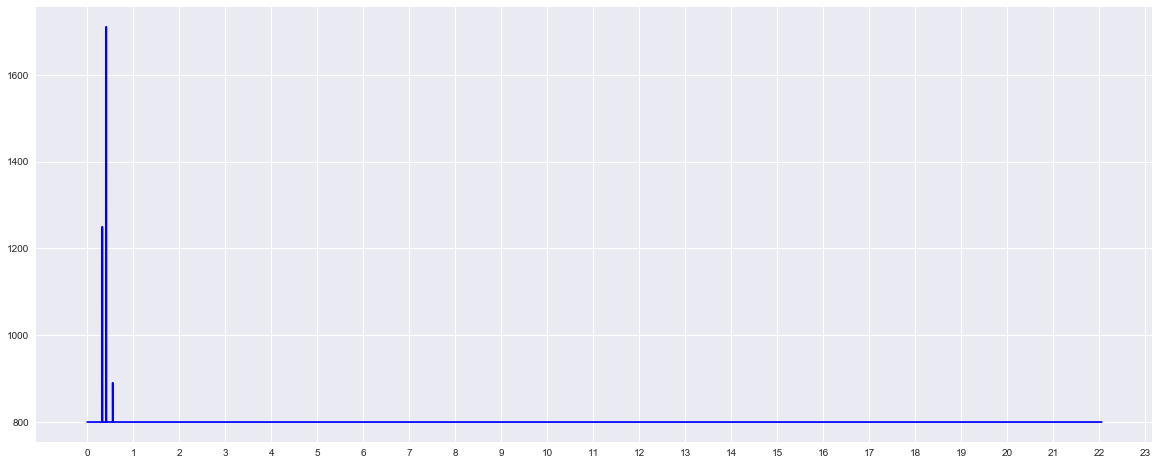

In [66]:
import matplotlib.pyplot as plt

import math

from scipy.io import wavfile

from numpy.fft import fft

plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.style.use("seaborn")

threshold = 800
fs, snd = wavfile.read("output.wav")
y = snd[:,0]

plt.figure(figsize=(20, 8))

n = len(y) 
p = fft(y) 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

freq = np.arange(0, len(mag), 1.0) * (fs / n)

if threshold != 0:
    print(np.unique(np.rint(freq[np.in1d(mag, mag[mag>threshold])])))
    mag[mag<threshold]=threshold

plt.plot(freq/1000, mag, color='b')
plt.xticks(np.arange(min(freq/1000), max(freq/1000)+1, 1.0))

plt.show()


If you look at the following link (http://www.sengpielaudio.com/calculator-notenames.htm), you will see that the chords are in the right range of frequencies. 

## Stationary versus Non-Stationary Signal
Now let's investigate the difference between stationary and non-stationary signals and some of the disadvantages of using Fourier Tranform. Below we generate a stationary signal with a frequcny of 1 and an ampltiude of 3. It will have 10 sinusodials. As you can we in the second generated figure, we can obtain our frequency and amplitude when we use FFT. 

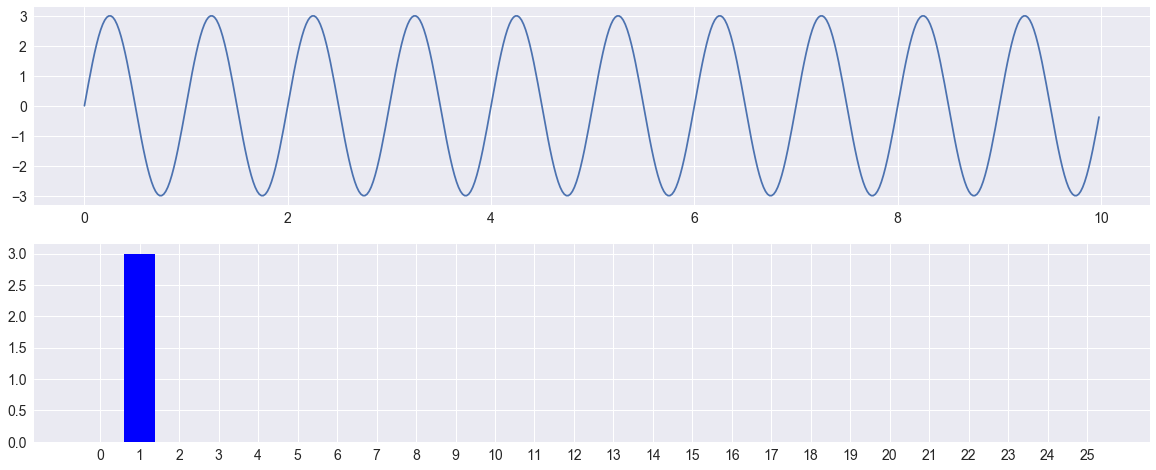

In [13]:
plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=50
x,amplitude1   = gen_wave(1,3,10,0,sr)

# x,amplitude2   = gen_wave(2,2,10,0,sr)

# # x,amplitude3   = gen_wave(3,4,10,0,sr)


# #  Anomally
# #  Anomally
# # y[2*sr:3*sr] = y[2*sr:3*sr] + y2[2*sr:3*sr]
# amplitude1[2*sr:3*sr] = amplitude1[2*sr:3*sr] + amplitude2[2*sr:3*sr]
axarr[0].plot(x, amplitude1)

n = len(amplitude1) 
p = fft(amplitude1) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()

In this example we will add another sinusodial signal to the signal we generated above. This signal will be added to the 2nd second, and it will have Frequency of 4, Amplitude of 20, and it will involve 10 sinusodials. The fact that we added the second signal only at a specific time interval helped us to obtain a non-statitonary signal. If you calculate the FFT of this signal, you will realise that the representation of this signal is not very clear and it is difficult to understand the exact moment of change occured in our signal. This change can be caused by anything. Our data can be a sensor monitoring temperature or huminidity, and there might be a suddent change in the temperature. It is very clear that we cannot obtain a very good representation of our data if we use FFT for non-stationary data by following this strategy. 

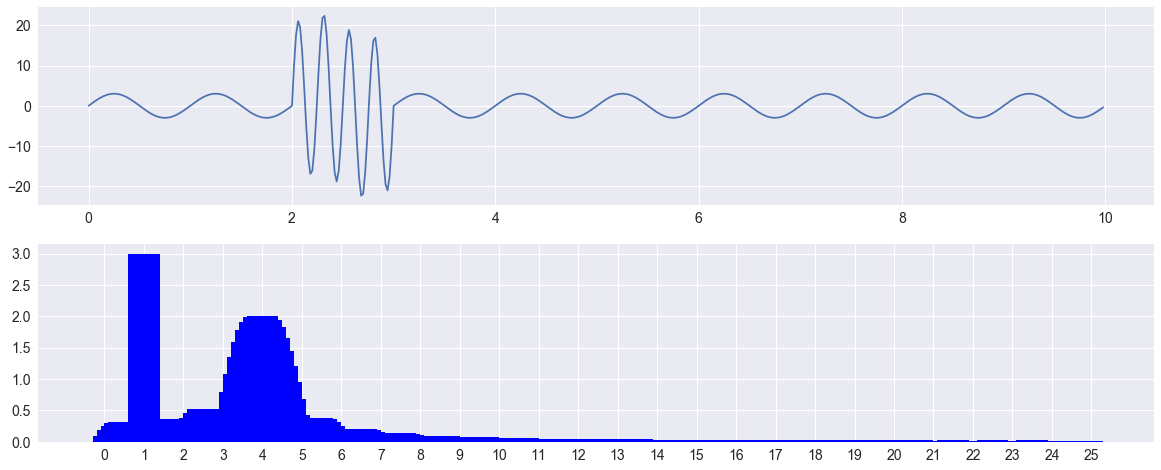

In [14]:
plt.style.use("seaborn")
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14

f, axarr = plt.subplots(2, figsize=(20, 8))

sr=50
x,amplitude1   = gen_wave(1,3,10,0,sr)

x,amplitude2   = gen_wave(4,20,10,0,sr)

# # x,amplitude3   = gen_wave(3,4,10,0,sr)


# #  Anomally
# #  Anomally
# # y[2*sr:3*sr] = y[2*sr:3*sr] + y2[2*sr:3*sr]
amplitude1[2*sr:3*sr] = amplitude1[2*sr:3*sr] + amplitude2[2*sr:3*sr]
axarr[0].plot(x, amplitude1)

n = len(amplitude1) 
p = fft(amplitude1) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

axarr[1].bar(x, mag, color='b')
axarr[1].xaxis.set_ticks(np.arange(min(x), max(x)+1, 1.0))

plt.show()